In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
train_df.dtypes

id              int64
keyword        object
location       object
text           object
target          int64
words_count     int64
dtype: object

In [12]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

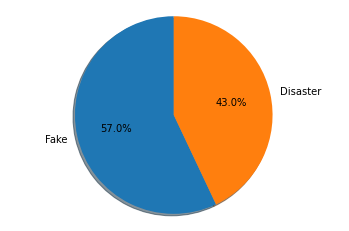

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fake', 'Disaster'

fig1, ax1 = plt.subplots()
ax1.pie(train_df['target'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [19]:
train_df['words_count'] = train_df['text'].apply(lambda x: len(x.lower().split()))
train_df.head()

,id,keyword,location,text,target,words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


Lets see value counts for length of the tweet for disaster and fake

In [25]:
disaters_word_count = train_df.loc[train_df['target']==1,['words_count']]

In [27]:
disaters_word_count['words_count'].value_counts()

18    277
17    243
11    221
13    218
15    211
14    207
16    191
19    191
20    186
12    186
10    149
9     143
21    133
8     133
22    126
23     89
7      83
24     57
6      52
25     42
5      39
4      24
26     22
27     19
3      13
28      6
29      4
2       4
30      2
Name: words_count, dtype: int64

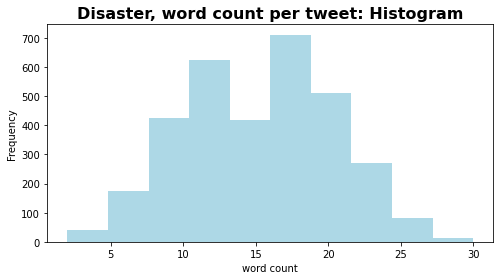

In [32]:
# histogram
# the same, but horizontal
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Disaster, word count per tweet: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('word count')
disaters_word_count['words_count'].plot.hist(color='lightblue', figsize=(8, 4))

plt.show()

Text(0.5, 1.0, 'Tweets word per disaster tweet')

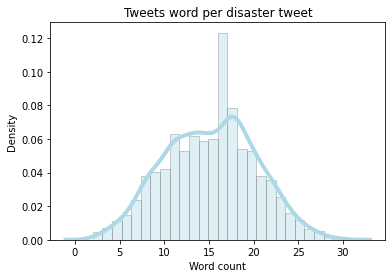

In [34]:
# histogram with density distribution
# Density Plot and Histogram using sns
sns.distplot(disaters_word_count['words_count'], hist=True, kde=True, 
             color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Tweets word per disaster tweet')

Same for non disaster

In [36]:
fakes_word_count = train_df.loc[train_df['target']==0,['words_count']]

In [40]:
fakes_word_count['words_count'].value_counts()

11    276
16    260
17    251
14    243
12    229
13    227
20    223
9     220
18    217
15    214
19    199
10    185
21    163
8     160
7     159
22    153
6     134
24    132
23    131
5     120
4      91
25     87
26     76
3      62
27     41
28     35
2      30
29      9
1       8
30      4
31      3
Name: words_count, dtype: int64

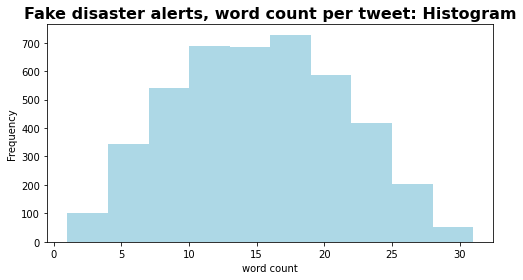

In [44]:
# histogram
# the same, but horizontal
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Fake disaster alerts, word count per tweet: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('word count')
fakes_word_count['words_count'].plot.hist(color='lightblue', figsize=(8, 4))

plt.show()

Text(0.5, 1.0, 'Tweets words count per fake disaster alerts')

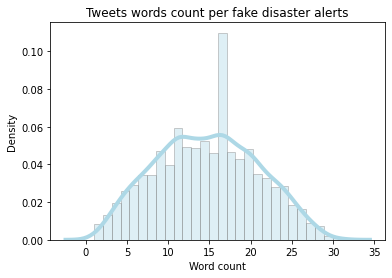

In [45]:
# histogram with density distribution
# Density Plot and Histogram using sns
sns.distplot(fakes_word_count['words_count'], hist=True, kde=True, 
             color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Tweets words count per fake disaster alerts')

### Now I want to analyze the overal word count distribution + the correlation between this and the word count

In [48]:
train_df['words_count'].value_counts()

11    497
18    494
17    494
16    451
14    450
13    445
15    425
12    415
20    409
19    390
9     363
10    334
21    296
8     293
22    279
7     242
23    220
24    189
6     186
5     159
25    129
4     115
26     98
3      75
27     60
28     41
2      34
29     13
1       8
30      6
31      3
Name: words_count, dtype: int64

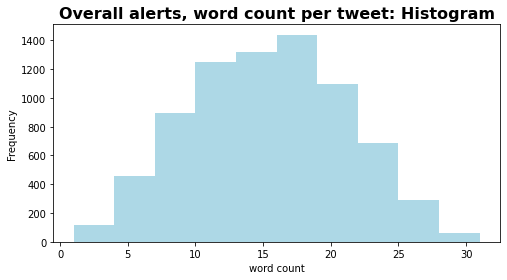

In [50]:
# histogram
# the same, but horizontal
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Overall alerts, word count per tweet: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('word count')
train_df['words_count'].plot.hist(color='lightblue', figsize=(8, 4))

plt.show()

Text(0.5, 1.0, 'Tweets words count per disaster alerts')

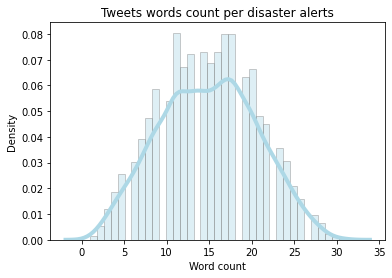

In [51]:
# histogram with density distribution
# Density Plot and Histogram using sns
sns.distplot(train_df['words_count'], hist=True, kde=True, 
             color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Tweets words count per disaster alerts')

### Correlation

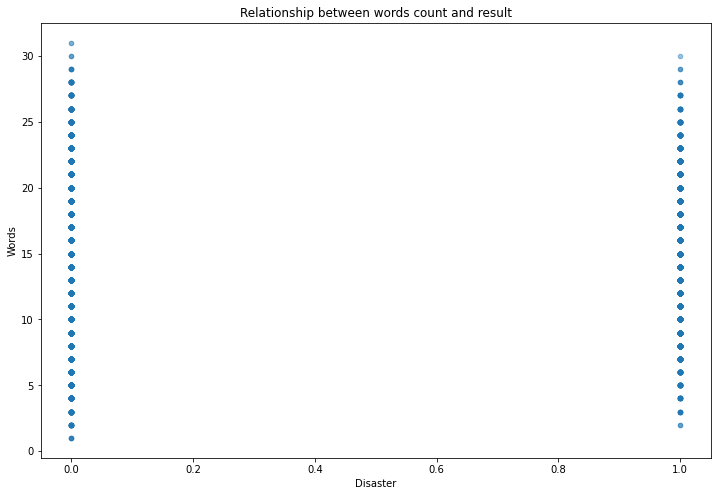

In [53]:
train_df.plot.scatter('target','words_count', title='Relationship between words count and result',alpha=0.25,figsize=(12,8));
ax=plt.gca()
ax.set_ylabel('Words')
ax.set_xlabel('Disaster');

In [54]:
train_df.corr()

,id,target,words_count
id,1.000000,0.060781,0.006420
target,0.060781,1.000000,0.039966
words_count,0.006420,0.039966,1.000000


### it doent look like there is a strong correlationship between them, Lets explore keywords and disasters

In [58]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

### Top real disaster keywords

In [94]:
real_df = train_df.loc[train_df['target']==1]

In [95]:
real_kw_counts = real_df['keyword'].value_counts()
real_kw_counts

outbreak       39
derailment     39
wreckage       39
debris         37
typhoon        37
               ..
body%20bags     1
ruin            1
epicentre       1
blazing         1
body%20bag      1
Name: keyword, Length: 220, dtype: int64

In [119]:
real_kw_counts.mean()

14.677272727272728

In [96]:
real_kw_frame = real_kw_counts.to_frame()
real_kw_frame

,keyword
outbreak,39
derailment,39
wreckage,39
debris,37
typhoon,37
...,...
body%20bags,1
ruin,1
epicentre,1
blazing,1


In [97]:
# more than 30 matches
more_than_30 = real_kw_frame.loc[kw_frame['keyword']>30]
more_than_30

,keyword
outbreak,39
derailment,39
wreckage,39
debris,37
typhoon,37
oil%20spill,37
evacuated,32
suicide%20bombing,32
rescuers,32
suicide%20bomb,32


Text(0.5, 0, 'keywords')

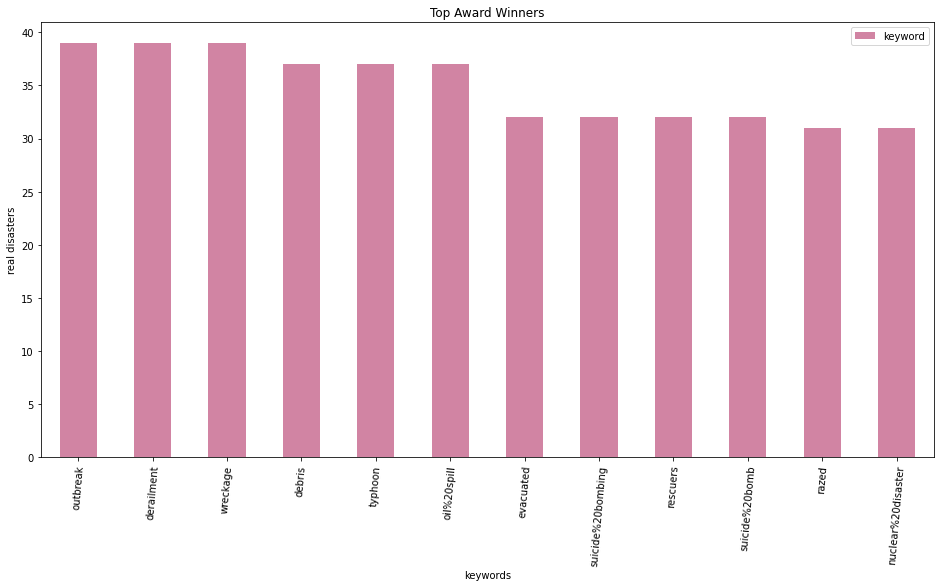

In [98]:
more_than_30.plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('real disasters');
ax.set_xlabel('keywords')


### Top Fake disaster keywords

In [104]:
fake_df = train_df.loc[train_df['target']==0]
fake_df

15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
         ...   
7581    wrecked
7582    wrecked
7584        NaN
7587        NaN
7593        NaN
Name: keyword, Length: 4342, dtype: object

In [117]:
fake_kw_counts = fake_df['keyword'].value_counts()
fake_kw_counts

body%20bags          40
armageddon           37
harm                 37
deluge               36
wrecked              36
                     ..
typhoon               1
oil%20spill           1
outbreak              1
suicide%20bombing     1
suicide%20bomber      1
Name: keyword, Length: 218, dtype: int64

In [118]:
fake_kw_counts.mean()

19.8302752293578

In [106]:
fake_kw_frame = fake_kw_counts.to_frame()
fake_kw_frame

,keyword
body%20bags,40
armageddon,37
harm,37
deluge,36
wrecked,36
...,...
typhoon,1
oil%20spill,1
outbreak,1
suicide%20bombing,1


In [108]:
# more than 30 matches
fake_more_than_30 = fake_kw_frame.loc[fake_kw_frame['keyword']>30]
fake_more_than_30

,keyword
body%20bags,40
armageddon,37
harm,37
deluge,36
wrecked,36
ruin,36
twister,35
siren,35
explode,35
fear,35


Text(0.5, 0, 'keywords')

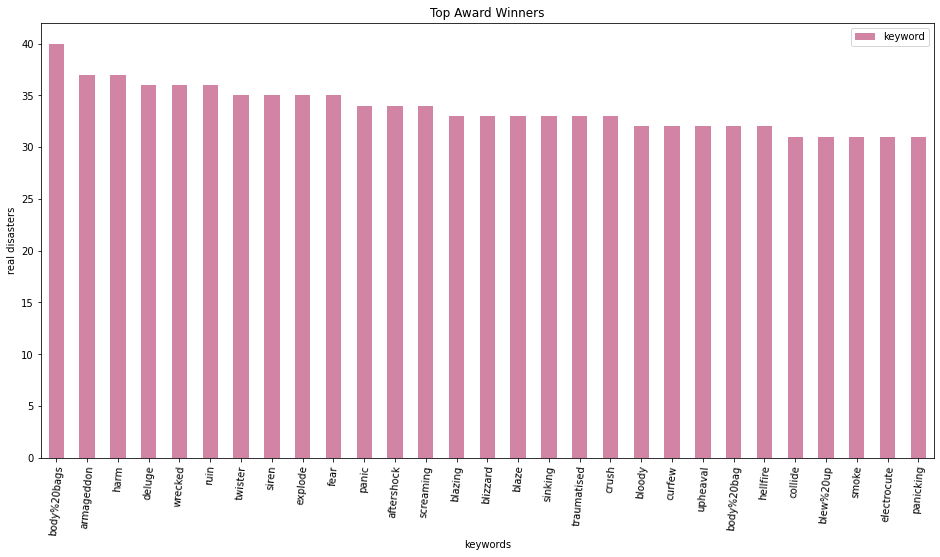

In [109]:
fake_more_than_30.plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('real disasters');
ax.set_xlabel('keywords')


### Lets look for a correlation between keywords and predictions

### Top disaster locations

In [112]:
real_location_counts = real_df['location'].value_counts()
real_location_counts

USA                     67
United States           27
Nigeria                 22
India                   20
Mumbai                  19
                        ..
St. Louis                1
Chattanooga TN           1
Republica Dominicana     1
Bahrain                  1
Loughborough.            1
Name: location, Length: 1513, dtype: int64

In [113]:
real_location_frame = real_location_counts.to_frame()
real_location_frame

,location
USA,67
United States,27
Nigeria,22
India,20
Mumbai,19
...,...
St. Louis,1
Chattanooga TN,1
Republica Dominicana,1
Bahrain,1


In [114]:
real_location_frame['location'].mean()

1.4514210178453404

In [125]:
# more than 10 matches
real_location_more_than_10 = real_location_frame.loc[real_location_frame['location']>10]
real_location_more_than_10

,location
USA,67
United States,27
Nigeria,22
India,20
Mumbai,19
UK,16
New York,16
London,16
"Washington, DC",15
Canada,13


Text(0.5, 0, 'locations')

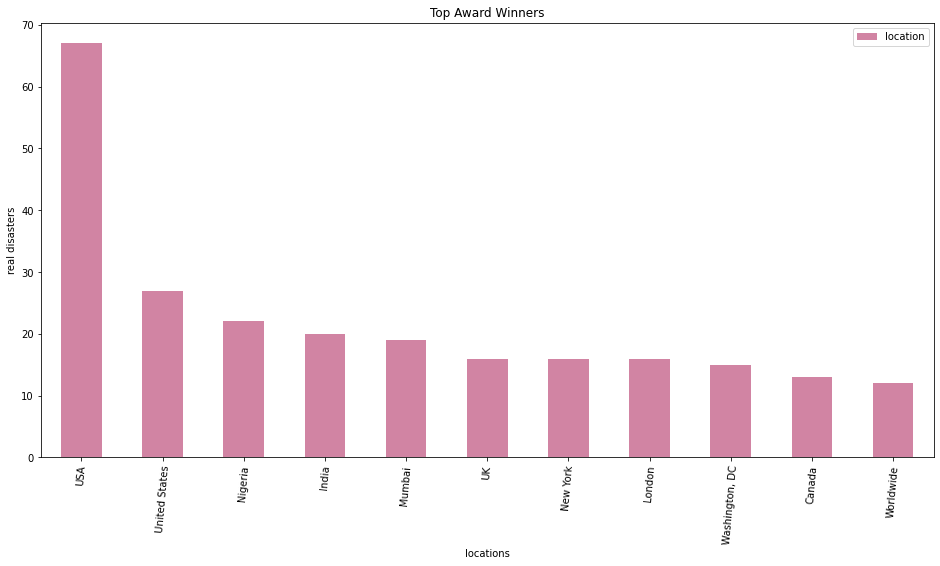

In [126]:
real_location_more_than_10.plot(kind='bar',figsize=(16,8),rot=85,title='Top Award Winners',color=(0.7, 0.2, 0.4, 0.6));
ax=plt.gca()
ax.set_ylabel('real disasters');
ax.set_xlabel('locations')
